# Lecture 3: Exploring Probability

We pretty much always want to start notebooks with standard imports like these and a %matplotlib magic command to make sure figures show up in the notebook:

In [1]:
%matplotlib inline   
                     # this sets up matplotlib to make plots show up in the notebook
import numpy as np   # imports the numpy package, abbreviated as np
import matplotlib    # imports the matplotlib package for making plots
import matplotlib.pyplot as plt    # imports the part of matplotlib we use most,
                                   #abbreviated as plt

In [2]:
import sys
sys.path.append('/Users/ameliacamino/python/')
import sim2coins as s2c 

## More work with modules

You should have put the function from lecture2.ipynb in a file we can use as a module.  Our code was:


    import numpy.random as random
    import numpy as np
    
    def sim2coins(ntests):
        # simulate ntests tosses of 2 coins 
        ntests=int(ntests)
        coin1=random.rand(ntests) > 0.5
        coin2=random.rand(ntests) > 0.5
        return np.sum( coin1 == coin2 )/ntests
        
You should have placed this in a file named sim2coins.py .     

__Next import and test your code: change the number of simulations below.__

In [3]:
ntests = 5E4
print(s2c.sim2coins( int(ntests) ) )

0.25064


In [4]:
ntests = 20
print(s2c.sim2coins( int(ntests) ) )

0.3


__Now, modify sim2coins to check for the fraction of cases where coin1 is tails (==False) and coin2 is heads (==True).  Run that code below.__  Note that you will need to use `np.logical_and`; you can also get help on it in the code box below, using ?.  For convenience, you should also make it convert ntests to an integer using the `int()` function.

In [5]:
print(s2c.sim2coins(1000))

0.263


Python will automatically compile a module the first time you import it.  However, to save time it won't automatically recompile a routine after that.  We have to force it to.

To get python to incorporate our changes, just reimporting won't do it.  __Do `reload(s2c)` in the below code box, and test your code again in the box below.__  

(Note: you could also go to the Kernel menu above and choose 'Restart', then the Cell menu above and do 'run all'; but that's overkill).

In [6]:
from importlib import reload
reload(s2c)

<module 'sim2coins' from '/Users/ameliacamino/python/sim2coins.py'>

In [7]:
ntests = 1000
print(s2c.sim2coins( int(ntests) ) )

0.269


## Testing the frequentist definition of probability

Let's calculate the fraction of successes for different numbers of trials.  __Note there are a couple of items I want you to predict and discuss with your group!__

In [8]:
nsims_list=np.array([100,500,1000,5000,1E4,5E4,1E5,1E6])

nsims_list=nsims_list.astype(int) # this will convert the array to integers all at once

# PREDICT AND DISCUSS:
result=nsims_list*0.
print(result)

[0. 0. 0. 0. 0. 0. 0. 0.]


[0.31     0.226    0.259    0.2452   0.2492   0.25118  0.25141  0.249797]


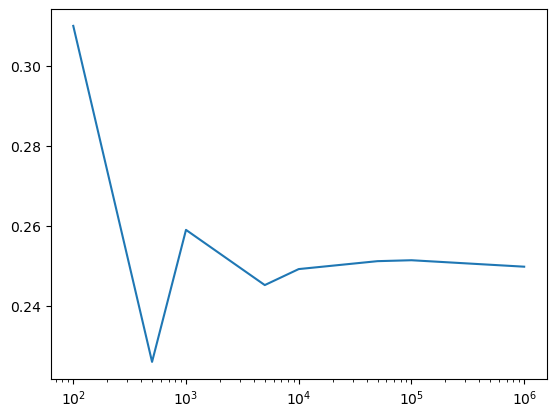

In [49]:
# PREDICT AND DISCUSS:
for i,nsims in enumerate(nsims_list):
     result[i]=s2c.sim2coins(nsims )

print(result)
        
#PUT YOUR CODE FOR PLOTTING IN THIS CODE BOX! 
#WHEN YOU MODIFY TO LOOP THROUGH 20 TIMES, DO THAT IN THIS BOX TOO
#  (MAKE SURE THE PLOT COMMAND IS INSIDE THE LOOP!)
plt.semilogx(nsims_list,result)

[0.26    0.25    0.249   0.244   0.2499  0.2522  0.24937 0.25046]


(-0.05, 0.05)

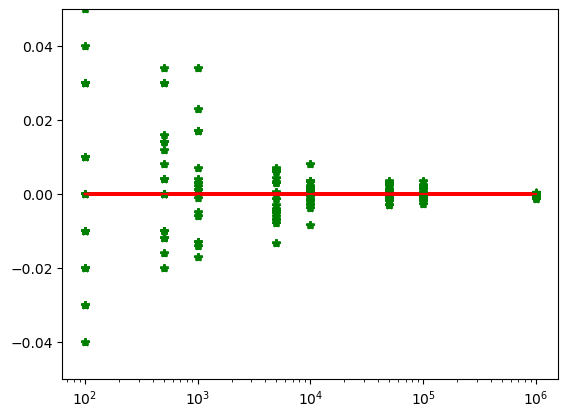

In [11]:
# PREDICT AND DISCUSS:
for x in range(20):
    for i,nsims in enumerate(nsims_list):
        result[i]=s2c.sim2coins(nsims )
        plt.semilogx(nsims_list,result-0.25, linestyle='None', marker = "*", 
             color = "green")
        
        plt.plot(nsims,np.average(result),color="blue")
        
        plt.plot(nsims_list,result*0.0, color = "red")
print(result)

plt.ylim(-0.05,0.05)     
#PUT YOUR CODE FOR PLOTTING IN THIS CODE BOX! 
#WHEN YOU MODIFY TO LOOP THROUGH 20 TIMES, DO THAT IN THIS BOX TOO
#  (MAKE SURE THE PLOT COMMAND IS INSIDE THE LOOP!)

# Plotting and exploring

__In the code cell above, plot the fraction of successes as a function of the number of simulations.__

Now, make a series of modifications:

__1) Plot the result with 0.25 (the expected probability) subtracted from it, as a function of nsims, with the below changes.__
- Plot the points as green stars (look at the help on `plt.plot()` ).  
- Use a logarithmic x axis (look at the help on `plt.xscale` or `plt.semilogx`)
- Use a y axis range from -0.05 to +0.05 (look at the help on `plt.ylim()`)

__2) By adding another, outer for loop, repeat the calculation 20 times, overplotting all the results.__
		If you put all the plot commands in the same code box (within the loop), all the plots will be shown on the same axes, as we want.

__3) Overplot the line y=0 to help guide the eye.__

__Extra: If your group is done and you are waiting around for other groups, add code to overplot the average of all the results at each `nsims` value as a line.  Add labels to your axes and a title to the figure.  Remember that you can type plt. and then hit tab to get a list of all the functions in the `plt` (actually `pyplot`) library.__

[0.21     0.248    0.272    0.246    0.2509   0.24888  0.25221  0.250313]


(-0.05, 0.05)

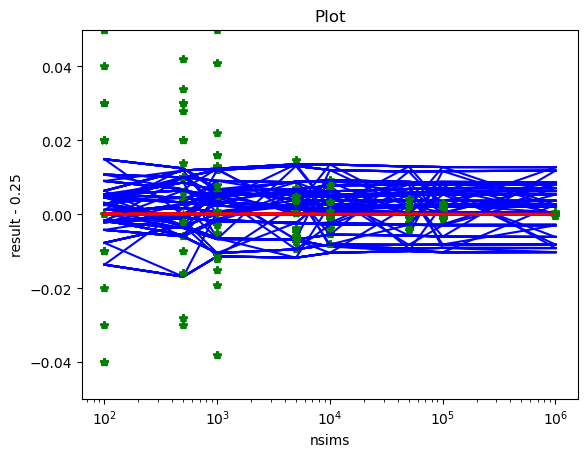

In [13]:
average=nsims_list*0.0

for x in range(20):
    for i,nsims in enumerate(nsims_list):
        result[i]=s2c.sim2coins(nsims )
        #print(result[i])
        average[i]=np.average(result-0.25) #what's going on????
        #print(average)
        plt.semilogx(nsims_list,result-0.25, linestyle='None', marker = "*", 
             color = "green")
        
        plt.plot(nsims_list,average, color = "blue")
        plt.plot(nsims_list,result*0.0, color = "red")
print(result)
plt.title('Plot')
plt.xlabel('nsims')
plt.ylabel('result - 0.25')
plt.ylim(-0.05,0.05) 

## Simulating Dice

__Here are 3 ways for generating dice rolls.  Check that they give similar results in the average using np.mean().__ Note that I have not filled in all the code for the `np.ceil()` method as an exercise for you to fill in.

In [12]:
from numpy import random
nsims=1000

#Floor: 
rolls_f=np.floor(random.rand(nsims)*6) + 1

#Round:
rolls_r=np.round(random.rand(nsims)*6 + 0.5)

#Ceil:
rolls_c = np.ceil(random.rand(nsims)*6) - 1 # Your code here


In [14]:
avg_f = np.mean(rolls_f)
avg_r = np.mean(rolls_r)
avg_c = np.mean(rolls_c)

print(avg_f)
print(avg_r)
print(avg_c)

3.462
3.526
2.44


## Plotting histograms

Below we plot a histogram of die rolls.

__In the below code box, use the `bins` and `range` keywords with `plt.hist()` to plot the results in 6 bins, centered at 1,2,3,...6.  This is not how the bins will be set up by default!__  

As usual, you can do `?plt.hist()` to see the help information.

(array([173., 168., 162., 173., 169., 155.]),
 array([1.        , 1.83333333, 2.66666667, 3.5       , 4.33333333,
        5.16666667, 6.        ]),
 <BarContainer object of 6 artists>)

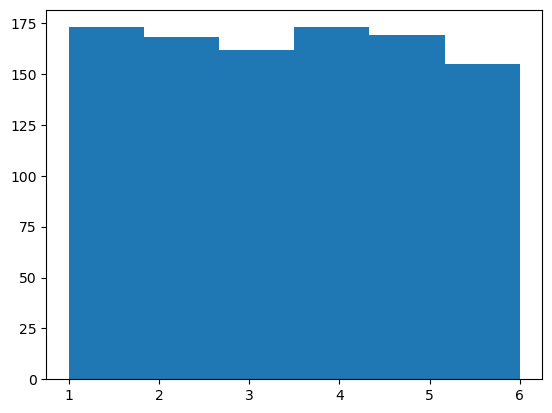

In [15]:
plt.hist(rolls_f, bins=6, range=(1,6))

In [16]:
?plt.hist

Signature:
plt.hist(
    x: 'ArrayLike | Sequence[ArrayLike]',
    bins: 'int | Sequence[float] | str | None' = None,
    *,
    range: 'tuple[float, float] | None' = None,
    density: 'bool' = False,
    weights: 'ArrayLike | None' = None,
    cumulative: 'bool | float' = False,
    bottom: 'ArrayLike | float | None' = None,
    histtype: "Literal['bar', 'barstacked', 'step', 'stepfilled']" = 'bar',
    align: "Literal['left', 'mid', 'right']" = 'mid',
    orientation: "Literal['vertical', 'horizontal']" = 'vertical',
    rwidth: 'float | None' = None,
    log: 'bool' = False,
    color: 'ColorType | Sequence[ColorType] | None' = None,
    label: 'str | Sequence[str] | None' = None,
    stacked: 'bool' = False,
    data=None,
    **kwargs,
) -> 'tuple[np.ndarray | list[np.ndarray], np.ndarray, BarContainer | Polygon | list[BarContainer | Polygon]]'
Docstring:
Compute and plot a histogram.

This method uses `numpy.histogram` to bin the data in *x* and count the
number of values in eac

# Multi-Dimensional Arrays 

A numpy array need not have only one dimension.  E.g.:

    img = np.zeros( (200,200) )

will create a 200 x 200 array, with zeros everywhere.  

Note: `np.zeros()` and similar routines can take a tuple of dimension sizes as input, for arbitrary numbers of dimensions. 



In [17]:
img = np.zeros((200,200))

## Rolling 10 dice

Two options: the slow way and the fast way.  First, some setup:

In [18]:
nsims = int(2E4)
rolls=np.floor(random.rand(nsims,10)*6 ) + 1


In [19]:
%%timeit
total_roll=np.zeros(nsims) 
for i in np.arange(nsims):
     total_roll[i]=np.sum(rolls[i,:])

30.8 ms ± 1.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [20]:
%%timeit
#This code does things the fast way
total_roll=np.sum(rolls,axis=1)

136 μs ± 241 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


### Plotting the results

__Use `plt.hist(total_roll)` to examine the results of your simulation in the below code box... adjust the number of bins and range as necessary to show all the values in the array__ (you may find `np.min()` and `np.max()` helpful)

14.0
58.0


(array([1.600e+01, 1.920e+02, 1.490e+03, 3.441e+03, 5.528e+03, 6.206e+03,
        2.338e+03, 7.450e+02, 4.000e+01, 4.000e+00]),
 array([14. , 18.4, 22.8, 27.2, 31.6, 36. , 40.4, 44.8, 49.2, 53.6, 58. ]),
 <BarContainer object of 10 artists>)

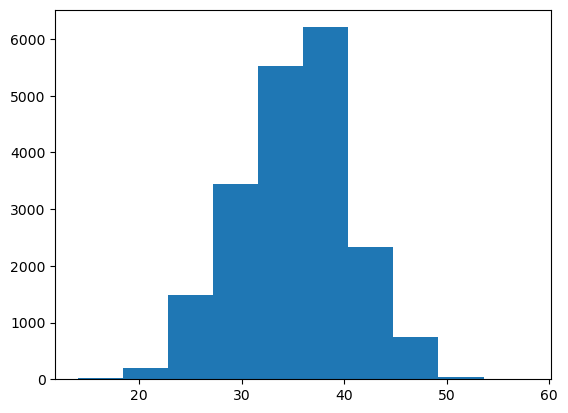

In [21]:
total_roll=np.sum(rolls,axis=1)
total_min=np.min(total_roll)
print(total_min)

total_max=np.max(total_roll)
print(total_max)
# add histogram plotting code here!
plt.hist(total_roll, range=(total_min,total_max))

### Simulating more dice

We can just simulate once, and take sums over different subsets with array slicing.

__Modify the below code cell to plot histograms for, 2, 5, 10, and 100 rolls.__

5.0
30.0


Text(0.5, 1.0, '5 rolls')

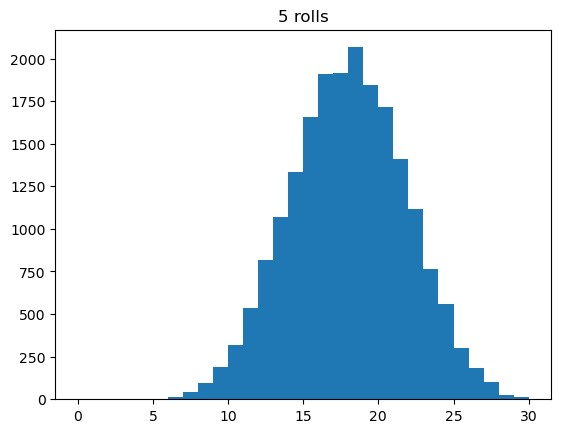

In [26]:
nsims=int(2E4)
rolls=np.floor(random.rand(nsims,100)*6 ) + 1

# add up to get results for the sum of 5 die rolls
total_roll_5=np.sum(rolls[:,0:5],axis=1)
print(np.min(total_roll_5))
print(np.max(total_roll_5))
#or just go ahead and plot that quantity:
plt.hist(np.sum(rolls[:,0:5],axis=1),range=[0,30],bins=30)
plt.title("5 rolls")

2.0
12.0


Text(0.5, 1.0, '2 rolls')

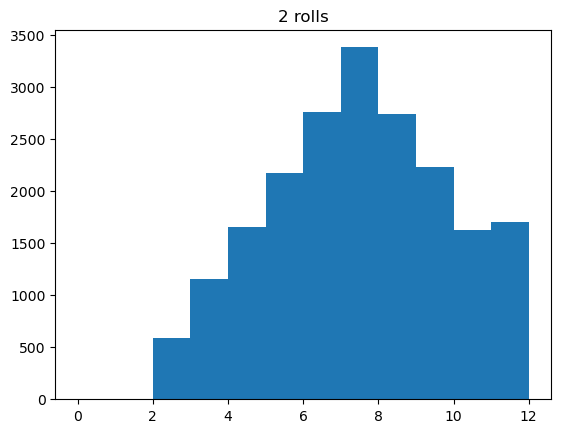

In [27]:
nsims=int(2E4)
rolls=np.floor(random.rand(nsims,100)*6 ) + 1

# add up to get results for the sum of 5 die rolls
total_roll_2=np.sum(rolls[:,0:2],axis=1)
print(np.min(total_roll_2))
print(np.max(total_roll_2))
#or just go ahead and plot that quantity:
plt.hist(np.sum(rolls[:,0:2],axis=1),range=[0,12],bins=12)
plt.title("2 rolls")

15.0
55.0


Text(0.5, 1.0, '10 rolls')

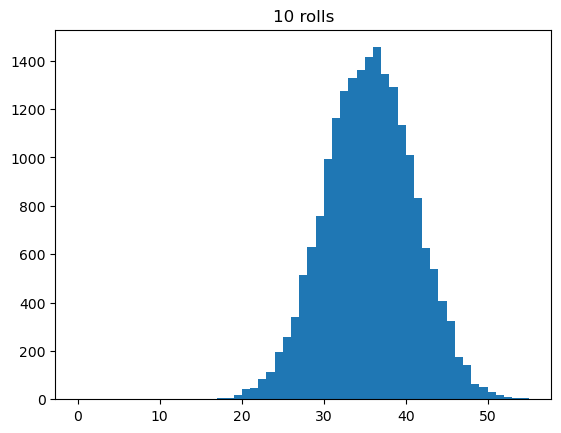

In [28]:
nsims=int(2E4)
rolls=np.floor(random.rand(nsims,100)*6 ) + 1

# add up to get results for the sum of 5 die rolls
total_roll_10=np.sum(rolls[:,0:10],axis=1)
print(np.min(total_roll_10))
print(np.max(total_roll_10))

#or just go ahead and plot that quantity:
plt.hist(np.sum(rolls[:,0:10],axis=1),range=[0,55],bins=55)
plt.title("10 rolls")

279.0
416.0


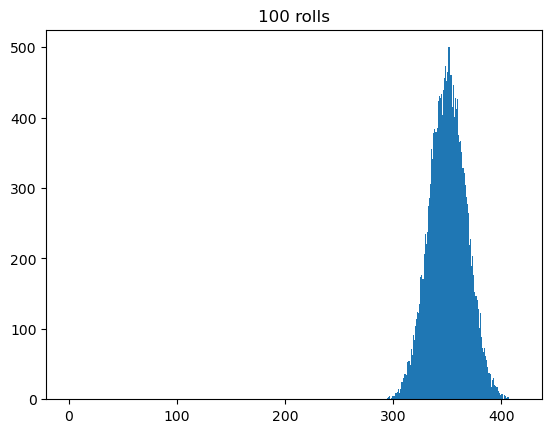

In [31]:
nsims=int(2E4)
rolls=np.floor(random.rand(nsims,100)*6 ) + 1

# add up to get results for the sum of 5 die rolls
total_roll_100=np.sum(rolls[:,0:100],axis=1)
print(np.min(total_roll_100))
print(np.max(total_roll_100))
#or just go ahead and plot that quantity:
plt.hist(np.sum(rolls[:,0:100],axis=1),range=[0,417],bins=417)
plt.title("100 rolls")
plt.savefig("spam.pdf")

# Saving output to a file

You can use `plt.savefig("<filename>")` in the above code box to store the plot in a file named `<filename>`.

__Save your plot in a PDF file named spam.pdf__.  Then, using the Mac finder/linux file explorer or the below code box, view the file.  In ipython/jupyter, you can issue shell commands by preceding them by '!'.

# If you have extra time

Try changing one of your plots to use a different font, choosing based upon your own aesthetic preferences.  See the example at http://matplotlib.org/examples/pylab_examples/fonts_demo.html  .

If you find something you like, you may want to change your default font; see http://matplotlib.org/users/customizing.html .

Try rolling even more dice, or plotting the mean roll (using `np.mean`) instead of the sum.